# Project 2 - Moneyball

## The Question

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Your job in this project is to see how this is reflected in the data we have.

## Part 1: Wrangling

The data you need to answer these questions is in the Salaries and Teams tables of the database.

#### Problem 1

**Using an SQL query only** compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). You should include other columns that will help when performing EDA later on (e.g., franchise ids, number of wins, number of games).

**Hint:** Take a good look at the [SQLite Documentation](https://www.sqlitetutorial.net/).

Include as a cell the SQL code you used to create this relation. As a markdown cell, describe how you dealt with any missing data in these two relations. Specifically, indicate if there is missing data in either table, and how the type of join you used determines how you dealt with this missing data. 

**You must display the head of the resulting data table in your notebook.  You should also display the results of one team over the time range to make sure your data is correct.**

**Hint:** For SQL you have to be mindful of integer vs. float division.  See the above tutorial on how to deal with this.

In [2]:
import sqlite3
import pandas


In [62]:

sql2016_file = './baseball-archive-sqlite-master/lahman2016.sqlite'
conn = sqlite3.connect(sql2016_file)

# salary_query = """SELECT teamID, yearID, W, G, CAST(W AS float)/CAST(G AS float)*100
# AS 'WinPercentage'
# FROM Teams
# INNER JOIN Salaries
# ON Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID"""

# add columns to this query as needed for the subsequent EDA
my_query = """
SELECT * FROM

(SELECT teamID, yearID, W, G, CAST(W AS float)/CAST(G AS float)*100 
AS 'WinPercentage'
FROM Teams) a
INNER JOIN
(SELECT sum(salary) AS total_payroll, yearID AS d_yearID, teamID AS d_teamID
FROM Salaries GROUP BY yearID) b

ON a.teamID = b.d_teamID AND a.yearID = b.d_yearID
"""

payroll_winpercent = pandas.read_sql(my_query, conn)
desired_columns = ["teamID","yearID", "W", "G", "WinPercentage", "total_payroll"]

pw_df = payroll_winpercent[desired_columns]
pw_df.head()
#payroll_winpercent["WinPercentage"].corr(payroll_winpercent['total_payroll'])

,teamID,yearID,W,G,WinPercentage,total_payroll
0,ATL,1985,66,162,40.740741,261964696.0
1,ATL,1986,72,161,44.720497,307854518.0
2,ATL,1987,69,161,42.857143,272575375.0
3,ATL,1988,54,160,33.750000,300452424.0
4,ATL,1989,63,161,39.130435,359995711.0


## Part 2: Exploratory Data Analysis
## Payroll Distribution
### Problem 2
Write code to produce a plot that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014). This plot should be clear and interpretable.

Write code to produce a scatter plot that shows winning percentage as a function of total payroll. That is, the total payroll on the x-axis and win percentage is on the y axis.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

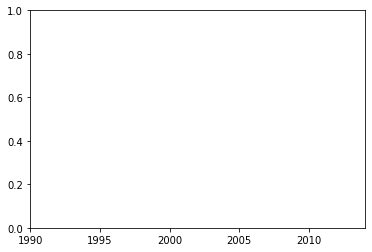

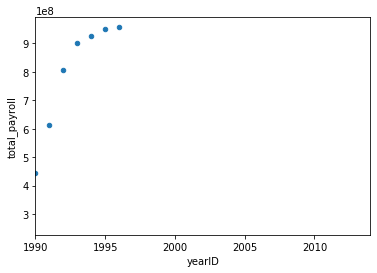

In [84]:
#fig, axes = plt.subplots(1, 24, figsize=(5, 5), sharey=True)

'''years = payroll_winpercent["yearID"].unique()
for ax, team in zip(axes, teams):
    #housing_type = housing_df[housing_df["Bldg Type"] == bldg_type]
    df_to_vis = payroll_winpercent[payroll_winpercent["teamID"] == team]
    df_to_vis.plot.scatter(x="yearID", y="total_payroll", ax=ax)
    ax.set_title(team)'''
teams = pw_df["teamID"].unique()
#for team in teams:

my_ax = plt.axes()
my_ax.set_xlim(left = 1990, right = 2014)
pw_df[pw_df["teamID"] == "ATL"].plot.scatter(x = "yearID", y = "total_payroll", xlim=(1990,2014))